In [1]:
%matplotlib inline
from math import sin, cos
from random import random, choice
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100


def func(x, y):
    return sin(x) + cos(y)


def ga_random(dimension):
    return tuple([10.0 * random() for _ in range(dimension)])


def create_population(size=100, dimension=2):
    return [ga_random(dimension) for _ in range(size)]


def crossing_genome(population, scale=2):
    new_population = list()
    for father in population:
        for _ in range(scale):
            mother = choice(population)
            # add small mutation
            child = tuple([(f + m) / 2 + random() - 0.5
                for f, m in zip(father, mother)])
            new_population.append(child)
    return new_population


def selection(population, fitness, scale=2):
    size = len(population) // scale
    return sorted(population, key=lambda x: fitness(*x))[:size]


def draw_plot(population):
    fig = plt.figure()
    ax = fig.gca(projection='3d', elev=60)

    X = np.arange(0, 10, 0.1)
    Y = np.arange(0, 10, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = np.sin(X) + np.cos(Y)

    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.8)
    
    xs = [x for x, _ in population]
    ys = [y for _, y in population]
    zs = [func(x, y) for x, y in population]
    
    ax.scatter(xs, ys, zs, c='black', marker='o')

    plt.show()

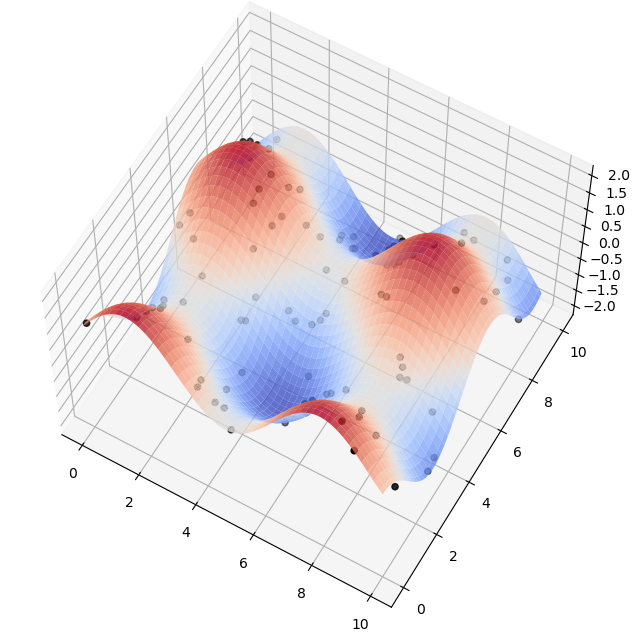

In [2]:
population = create_population(100)
draw_plot(population)

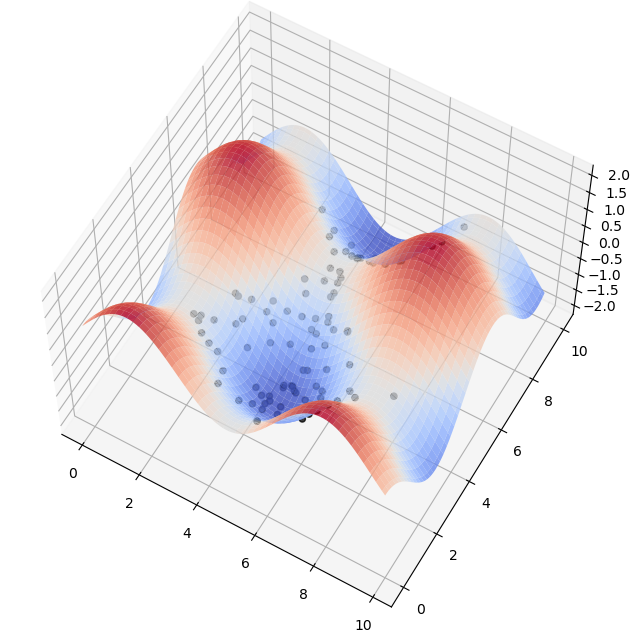

In [3]:
population = crossing_genome(population)

population = selection(population, func)

draw_plot(population)

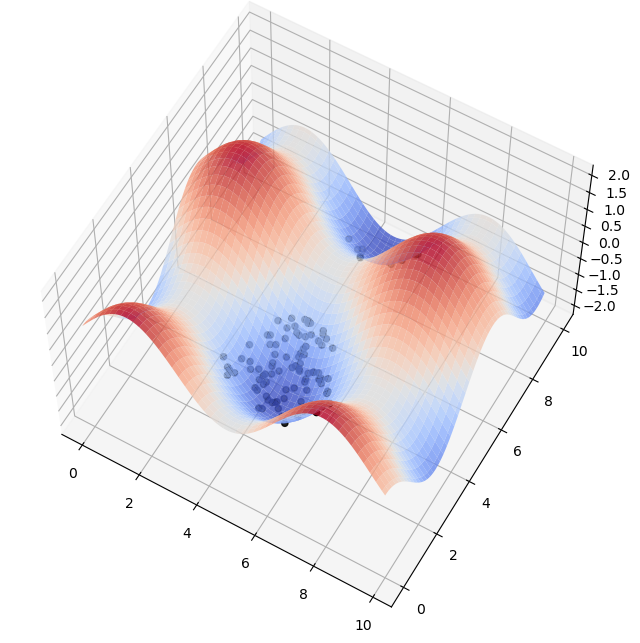

In [4]:
population = crossing_genome(population)

population = selection(population, func)

draw_plot(population)

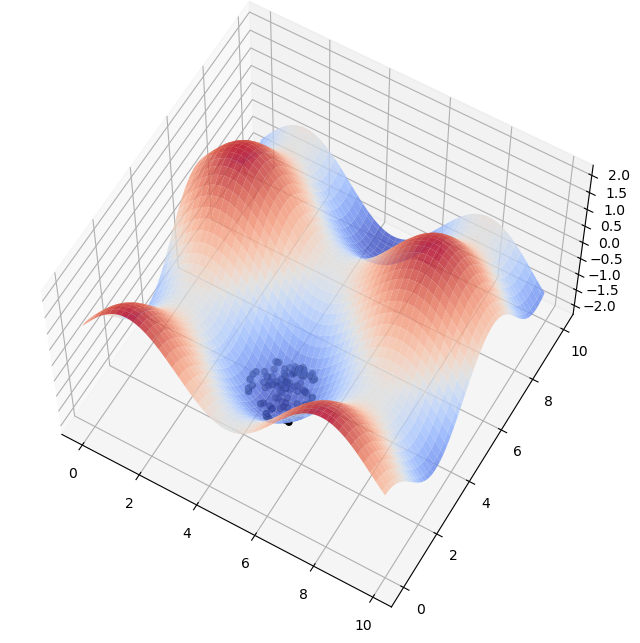

In [5]:
population = crossing_genome(population)

population = selection(population, func)

draw_plot(population)